# Statistics

In [ ]:
from numpy import array
from numpy import mean, var, std, cov, corrcoef
from numpy.linalg import eig, inv, pinv, qr, lstsq
from sklearn.decomposition import PCA
from matplotlib import pyplot

## Introduction to Multivariate Statistics

### Expected Value and Mean

In [ ]:
v = array([1,2,3,4,5,6])
print(v)

[1 2 3 4 5 6]


In [ ]:
result = mean(v)
print(result)

3.5


In [ ]:
M = array([
    [1,2,3,4,5,6],
    [1,2,3,4,5,6]])
print(M)

[[1 2 3 4 5 6]
 [1 2 3 4 5 6]]


In [ ]:
col_mean = mean(M, axis=0)
print(col_mean)

[1. 2. 3. 4. 5. 6.]


In [ ]:
row_mean = mean(M, axis=1)
print(row_mean)

[3.5 3.5]


### Variance and Standard Deviation

In [ ]:
v = array([1,2,3,4,5,6])
print(v)

[1 2 3 4 5 6]


In [ ]:
result = var(v, ddof=1)
print(result)

3.5


In [ ]:
M = array([
    [1,2,3,4,5,6],
    [1,2,3,4,5,6]])
print(M)

[[1 2 3 4 5 6]
 [1 2 3 4 5 6]]


In [ ]:
col_var = var(M, ddof=1, axis=0)
print(col_var)

[0. 0. 0. 0. 0. 0.]


In [ ]:
row_var = var(M, ddof=1, axis=1)
print(row_var)

[3.5 3.5]


In [ ]:
col_std = std(M, ddof=1, axis=0)
print(col_std)

[0. 0. 0. 0. 0. 0.]


In [ ]:
row_std = std(M, ddof=1, axis=1)
print(row_std)

[1.87082869 1.87082869]


### Covariance and Correlation

In [ ]:
x = array([1,2,3,4,5,6,7,8,9])
print(x)

[1 2 3 4 5 6 7 8 9]


In [ ]:
y = array([9,8,7,6,5,4,3,2,1])
print(y)

[9 8 7 6 5 4 3 2 1]


In [ ]:
Sigma = cov(x,y)[0,1]
print(Sigma)

-7.5


In [ ]:
corr = corrcoef(x,y)[0,1]
print(corr)

-1.0


### Covariance Matrix

In [ ]:
X = array([
    [1, 5, 8],
    [3, 5, 11],
    [2, 4, 9],
    [3, 6, 10],
    [1, 5, 10]])
print(X)

[[ 1  5  8]
 [ 3  5 11]
 [ 2  4  9]
 [ 3  6 10]
 [ 1  5 10]]


In [ ]:
Sigma = cov(X.T)
print(Sigma)

[[1.   0.25 0.75]
 [0.25 0.5  0.25]
 [0.75 0.25 1.3 ]]


## Principal Component Analysis

### Calculate Principal Component Analysis

In [ ]:
A = array([
    [1,2],
    [3,4],
    [5,6]])
print(A)

[[1 2]
 [3 4]
 [5 6]]


In [ ]:
M = mean(A.T, axis=1)

In [ ]:
C = A - M

In [ ]:
V = cov(C.T)

In [ ]:
values, vectors = eig(V)

In [ ]:
print(vectors)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [ ]:
print(values)

[8. 0.]


In [ ]:
P = vectors.T.dot(C.T)
print(P.T)

[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


### Principal Component Analysis in scikit-learn

In [ ]:
A = array([
    [1,2],
    [3,4],
    [5,6]])
print(A)

[[1 2]
 [3 4]
 [5 6]]


In [ ]:
pca = PCA(2)

In [ ]:
pca.fit(A)

PCA(n_components=2)

In [ ]:
print(pca.components_)

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [ ]:
print(pca.explained_variance_)

[8. 0.]


In [ ]:
B = pca.transform(A)
print(B)

[[-2.82842712e+00 -2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00  2.22044605e-16]]


## Linear Regression

In [ ]:
data = array([
    [0.05, 0.12],
    [0.18, 0.22],
    [0.31, 0.35],
    [0.42, 0.38],
    [0.5, 0.49]])
print(data)

[[0.05 0.12]
 [0.18 0.22]
 [0.31 0.35]
 [0.42 0.38]
 [0.5  0.49]]


In [ ]:
X, y = data[:, 0], data[:,1]
X = X.reshape(len(X), 1)

### Linear Regression Dataset

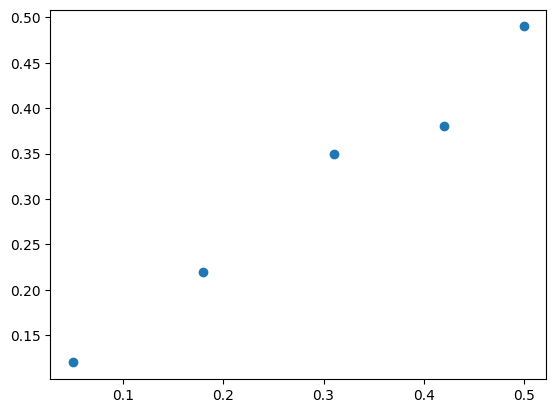

In [ ]:
pyplot.scatter(X, y)
pyplot.show()

### Solve via Inverse

In [ ]:
b = inv(X.T.dot(X)).dot(X.T).dot(y)
print(b)

[1.00233226]


In [ ]:
yhat = X.dot(b)

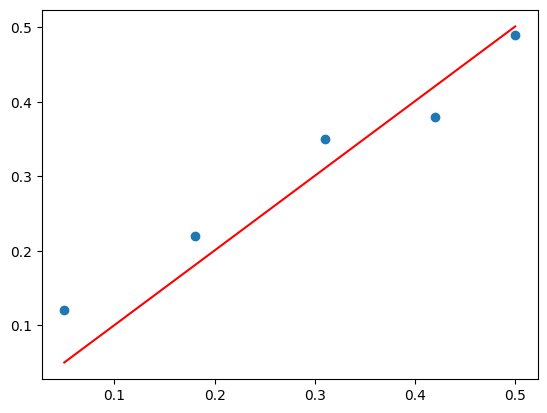

In [ ]:
pyplot.scatter(X,y)
pyplot.plot(X, yhat, color='red')
pyplot.show()

### Solve via QR Decomposition

In [ ]:
Q, R = qr(X)
b = inv(R).dot(Q.T).dot(y)
print(b)

[1.00233226]


In [ ]:
yhat = X.dot(b)

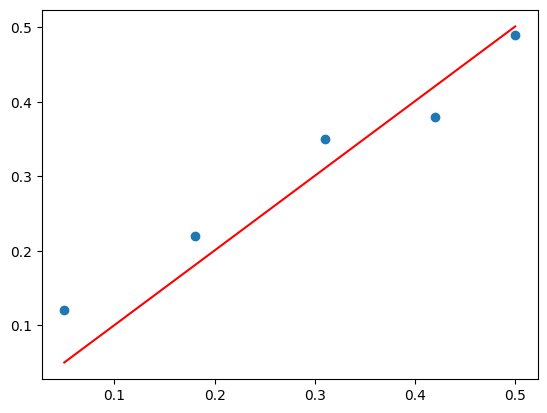

In [ ]:
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()

### Solve via SVD and Pseudoinverse

In [ ]:
b = pinv(X).dot(y)
print(b)

[1.00233226]


In [ ]:
yhat = X.dot(b)

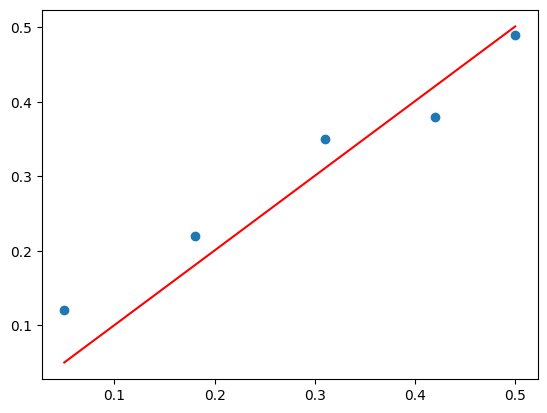

In [ ]:
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()

### Solve via Convenience Function

In [ ]:
b, residuals, rank, s = lstsq(X, y)
print(b)

[1.00233226]


/tmp/ipykernel_21840/4284049170.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b, residuals, rank, s = lstsq(X, y)


In [ ]:
yhat = X.dot(b)

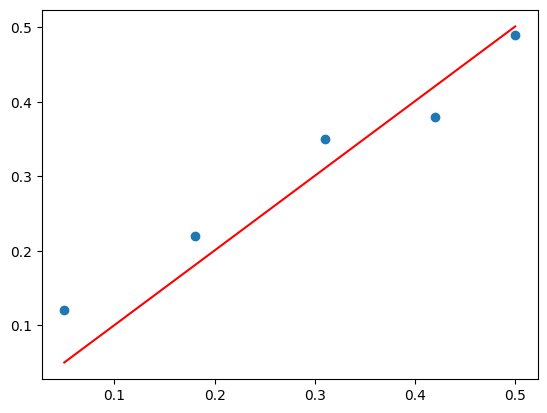

In [ ]:
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()